1) Develop a program to Load a dataset and select one numerical column. Compute mean, median, mode,
standard deviation, variance, and range for a given numerical column in a dataset. Generate a histogram and
boxplot to understand the distribution of the data. Identify any outliers in the data using IQR. Select a
categorical variable from a dataset. Compute the frequency of each category and display it as a bar chart or
pie chart.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading csv file
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# select one numerical column
num_col = 'Fare'

In [12]:
mean_value = df[num_col].mean()
median_value = df[num_col].median()
mode_value = df[num_col].mode()[0]
std_dev = df[num_col].std()
variance_value = df[num_col].var()
range_value = df[num_col].max() - df[num_col].min() #range is nothing but maximum value - min value


In [13]:
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance_value}")
print(f"Range: {range_value}")

Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Standard Deviation: 49.693428597180905
Variance: 2469.436845743117
Range: 512.3292


C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


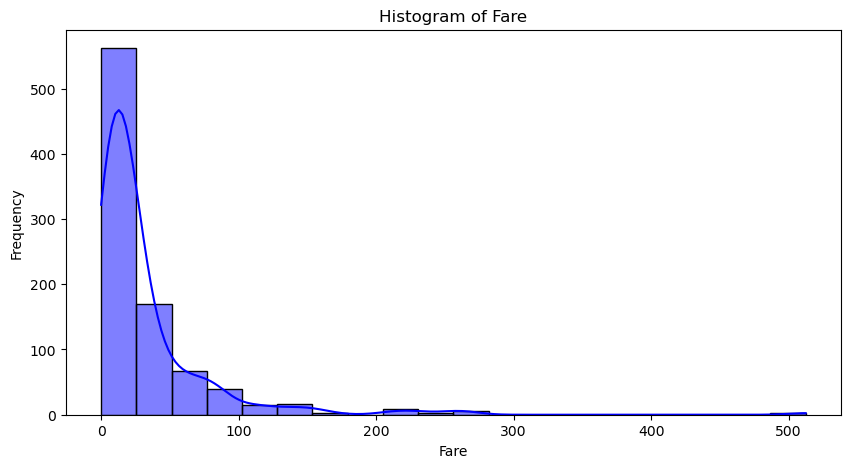

In [14]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[num_col], bins=20, kde=True, color='blue')
plt.title(f"Histogram of {num_col}")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

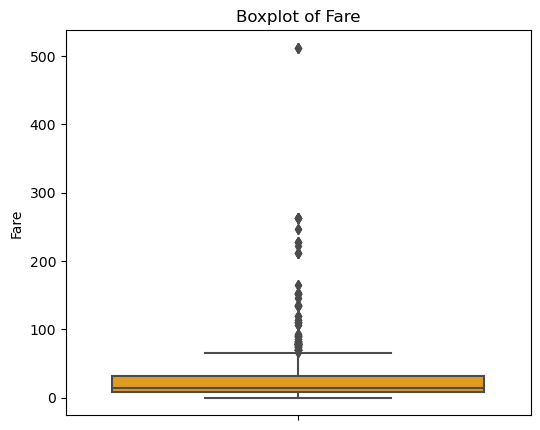

In [15]:
# Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df[num_col], color='orange')
plt.title(f"Boxplot of {num_col}")
plt.show()

In [16]:
# Identifying Outliers using IQR
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]
print("\nOutliers in the dataset:")
print(outliers[num_col])


Outliers in the dataset:
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [18]:
# Selecting a categorical column: '	Survived'
cat_col = 'Survived'

# Computing frequency of each category
category_counts = df[cat_col].value_counts()

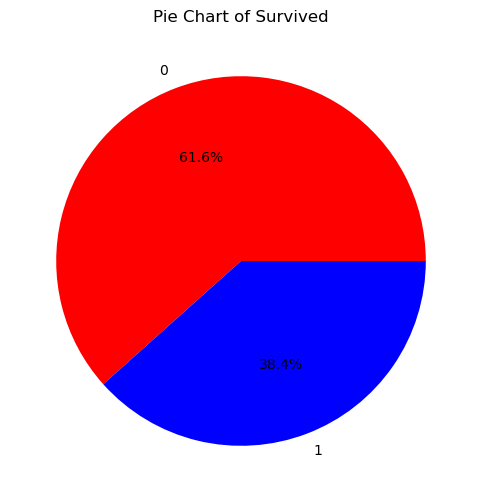

In [19]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title(f"Pie Chart of {cat_col}")
plt.show()

2) Develop a program to Load a dataset with at least two numerical columns (e.g., Iris, Titanic). Plot a scatter
plot of two variables and calculate their Pearson correlation coefficient. Write a program to compute the
covariance and correlation matrix for a dataset. Visualize the correlation matrix using a heatmap to know
which variables have strong positive/negative correlations.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load Iris dataset without column names
df = pd.read_csv("iris.data.csv", header=None)  # Ensure dataset is in the same directory
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Renaming columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Selecting two numerical columns for scatter plot and correlation analysis
num_col1 = 'sepal_length'
num_col2 = 'sepal_width'

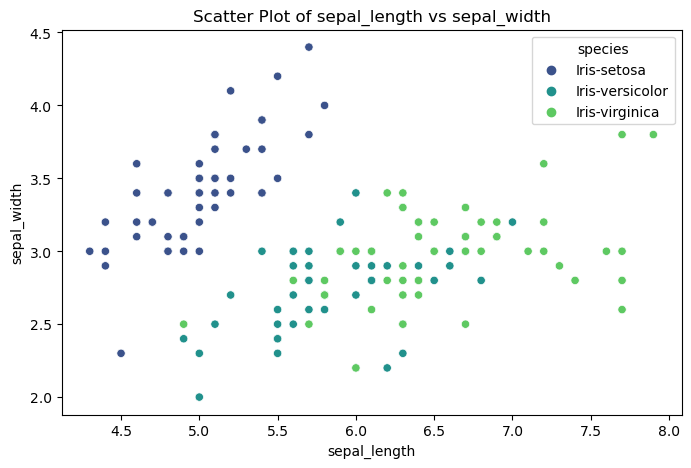

In [27]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[num_col1], y=df[num_col2], hue=df['species'], palette='viridis')
plt.title(f"Scatter Plot of {num_col1} vs {num_col2}")
plt.xlabel(num_col1)
plt.ylabel(num_col2)
plt.show()

In [28]:
# Compute Pearson Correlation Coefficient
pearson_corr = df[num_col1].corr(df[num_col2])
print(f"Pearson Correlation Coefficient between {num_col1} and {num_col2}: {pearson_corr}")

Pearson Correlation Coefficient between sepal_length and sepal_width: -0.10936924995064935


In [29]:
# Compute Covariance Matrix
cov_matrix = df[[num_col1, num_col2]].cov()
print("\nCovariance Matrix:")
print(cov_matrix)


Covariance Matrix:
              sepal_length  sepal_width
sepal_length      0.685694    -0.039268
sepal_width      -0.039268     0.188004


In [36]:
# Compute Correlation Matrix (excluding 'species' column)
corr_matrix = df.drop(columns=['species']).corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


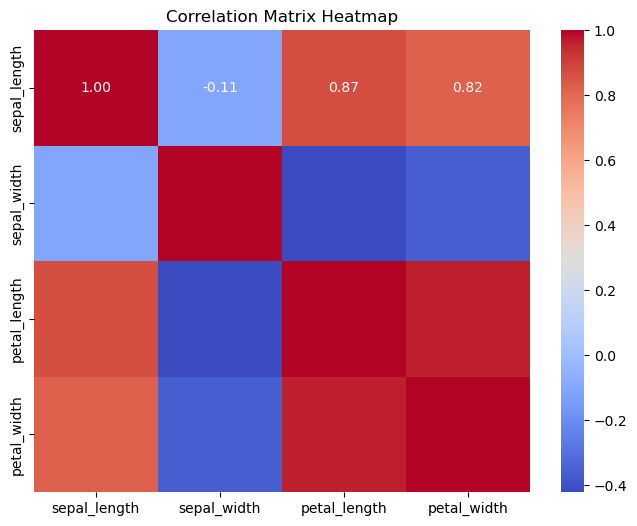

In [37]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

3) Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of
the Iris dataset from 4 features to 2.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
# Load Iris dataset without column names
df = pd.read_csv("iris.data.csv", header=None)

# Renaming columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [40]:
# Selecting only numerical features for PCA
X = df.drop(columns=['species'])


In [41]:
# Standardizing the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Applying PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [43]:
# Creating a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']  # Add species back for visualization

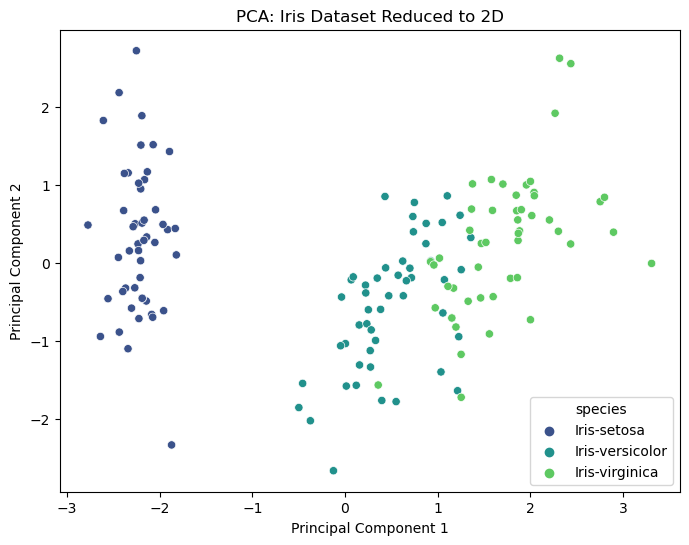

In [44]:
# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['species'], palette='viridis')
plt.title("PCA: Iris Dataset Reduced to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [45]:
# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72770452 0.23030523]


4) Develop a program to load the Iris dataset. Implement the k-Nearest Neighbors (k-NN) algorithm for
classifying flowers based on their features. Split the dataset into training and testing sets and evaluate the
model using metrics like accuracy and F1-score. Test it for different values of 𝑘 (e.g., k=1,3,5) and evaluate
the accuracy. Extend the k-NN algorithm to assign weights based on the distance of neighbors (e.g.,
𝑤𝑒𝑖𝑔ℎ𝑡=1/𝑑2 ). Compare the performance of weighted k-NN and regular k-NN on a synthetic or real-world
dataset.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [47]:
# Load Iris dataset without column names
df = pd.read_csv("iris.data.csv", header=None)

# Renaming columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [48]:
# Splitting features (X) and target (y)
X = df.drop(columns=['species'])
y = df['species']

In [49]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Splitting into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
def evaluate_knn(k_values, weighted=False):
    results = []
    for k in k_values:
        if weighted:
            model = KNeighborsClassifier(n_neighbors=k, weights=lambda d: 1 / (d**2 + 1e-5))  # Weighted k-NN
        else:
            model = KNeighborsClassifier(n_neighbors=k)  # Regular k-NN
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results.append((k, acc, f1))
        print(f"k={k} | Accuracy: {acc:.4f} | F1-score: {f1:.4f}")
    
    return results

In [52]:
# Test for different k values (1, 3, 5)
k_values = [1, 3, 5]

print("\n--- Regular k-NN Results ---")
regular_knn_results = evaluate_knn(k_values)

print("\n--- Weighted k-NN Results ---")
weighted_knn_results = evaluate_knn(k_values, weighted=True)


--- Regular k-NN Results ---
k=1 | Accuracy: 0.9667 | F1-score: 0.9664
k=3 | Accuracy: 1.0000 | F1-score: 1.0000
k=5 | Accuracy: 1.0000 | F1-score: 1.0000

--- Weighted k-NN Results ---
k=1 | Accuracy: 0.9667 | F1-score: 0.9664
k=3 | Accuracy: 1.0000 | F1-score: 1.0000
k=5 | Accuracy: 1.0000 | F1-score: 1.0000


6) Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select
appropriate data set for your experiment and draw graphs.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
# Load Iris dataset without column names
df = pd.read_csv("HousingData.csv")

In [57]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [58]:
# Selecting a feature and target
X = df[['RM']].values  # Feature: Average number of rooms per dwelling
y = df['MEDV'].values  # Target: Median house price

In [59]:
# Standardizing the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# Function to compute weights using Gaussian kernel
def get_weights(X_train, query_point, tau):
    return np.exp(-np.sum((X_train - query_point) ** 2, axis=1) / (2 * tau ** 2))

In [61]:
# Locally Weighted Regression Function
def locally_weighted_regression(X_train, y_train, tau, X_test):
    y_pred = []
    
    for x in X_test:
        weights = get_weights(X_train, x, tau)  # Compute weights
        W = np.diag(weights)  # Convert to diagonal matrix
        
        # Compute theta using weighted normal equation: (X'WX)^(-1) X'Wy
        X_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y_train)
        
        # Predict y for the given x
        x_bias = np.array([1, x[0]])  # Add bias term
        y_pred.append(x_bias @ theta)
    
    return np.array(y_pred)

In [62]:
# Test points for prediction
X_test = np.linspace(min(X_scaled), max(X_scaled), 100).reshape(-1, 1)

# Different tau (smoothing) values
tau_values = [0.1, 0.5, 1.0]

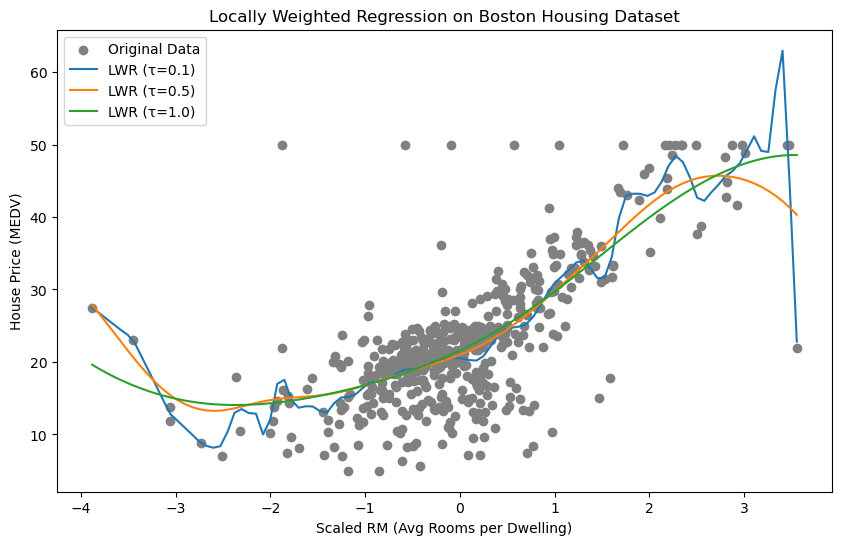

In [63]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='gray', label='Original Data')

for tau in tau_values:
    y_pred = locally_weighted_regression(X_scaled, y, tau, X_test)
    plt.plot(X_test, y_pred, label=f'LWR (τ={tau})')

plt.xlabel('Scaled RM (Avg Rooms per Dwelling)')
plt.ylabel('House Price (MEDV)')
plt.title('Locally Weighted Regression on Boston Housing Dataset')
plt.legend()
plt.show()

7) Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use
Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction)
for Polynomial Regression.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Load Iris dataset without column names
df_boston = pd.read_csv("HousingData.csv")

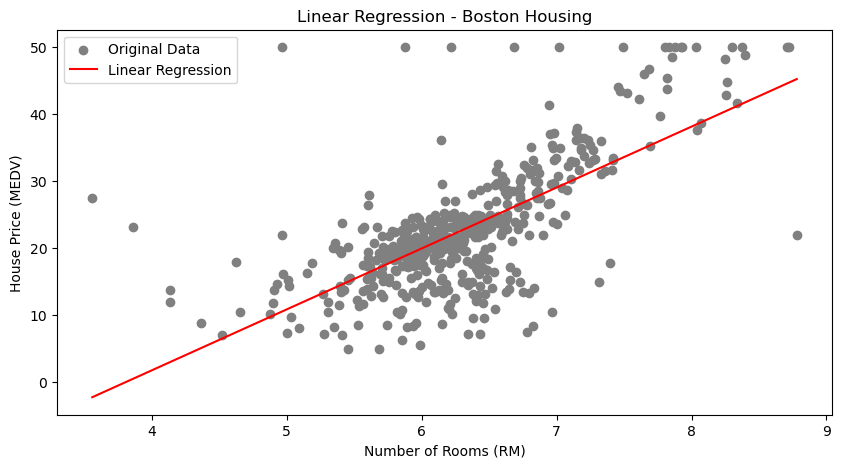

In [70]:
# ========== LINEAR REGRESSION: BOSTON HOUSING DATASET ==========

# Select feature and target
X_boston = df_boston[['RM']].values  # Number of rooms per dwelling
y_boston = df_boston['MEDV'].values  # Median house price

# Train Linear Regression Model
model_linear = LinearRegression()
model_linear.fit(X_boston, y_boston)

# Predict on test points
X_test = np.linspace(min(X_boston), max(X_boston), 100).reshape(-1, 1)
y_pred = model_linear.predict(X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_boston, y_boston, color='gray', label='Original Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Price (MEDV)')
plt.title('Linear Regression - Boston Housing')
plt.legend()
plt.show()

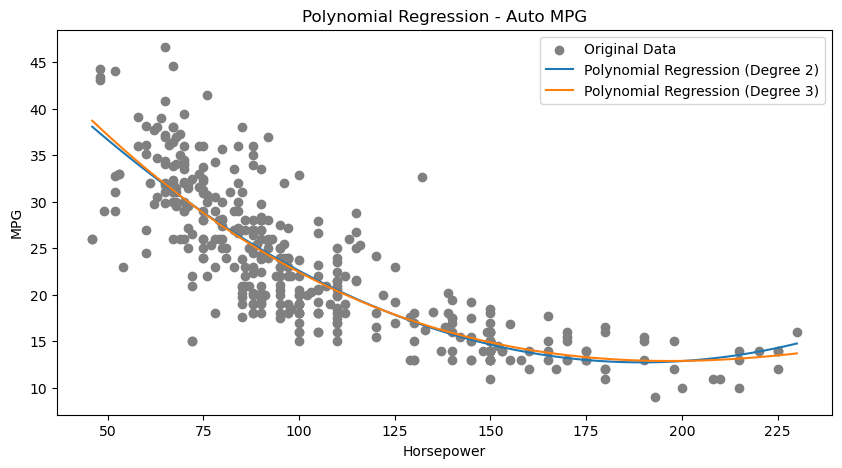

In [71]:
# ========== POLYNOMIAL REGRESSION: AUTO MPG DATASET ==========
# Load Auto MPG dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df_mpg = pd.read_csv(url)

# Remove missing values
df_mpg = df_mpg.dropna()

# Select feature and target
X_mpg = df_mpg[['horsepower']].values  # Feature: Horsepower
y_mpg = df_mpg['mpg'].values  # Target: Miles per gallon

# Standardize horsepower
scaler = StandardScaler()
X_mpg_scaled = scaler.fit_transform(X_mpg)

# Train Polynomial Regression (Degree 2 & 3)
degrees = [2, 3]
plt.figure(figsize=(10, 5))
plt.scatter(X_mpg, y_mpg, color='gray', label='Original Data')

for d in degrees:
    model_poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model_poly.fit(X_mpg_scaled, y_mpg)
    
    # Predict
    X_test_scaled = scaler.transform(np.linspace(min(X_mpg), max(X_mpg), 100).reshape(-1, 1))
    y_pred_poly = model_poly.predict(X_test_scaled)
    
    plt.plot(np.linspace(min(X_mpg), max(X_mpg), 100), y_pred_poly, label=f'Polynomial Regression (Degree {d})')

# Plot
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression - Auto MPG')
plt.legend()
plt.show()

8) Develop a program to load the Titanic dataset. Split the data into training and test sets. Train a decision tree
classifier. Visualize the tree structure. Evaluate accuracy, precision, recall, and F1-score.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [73]:
# Reading csv file
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
# Select relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male = 1, Female = 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Split data into features and target
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

C:\Users\vamsh\AppData\Local\Temp\ipykernel_17504\517266193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vamsh\AppData\Local\Temp\ipykernel_17504\517266193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\vamsh\AppData\Local\Temp\ipykernel_17504\517266193.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

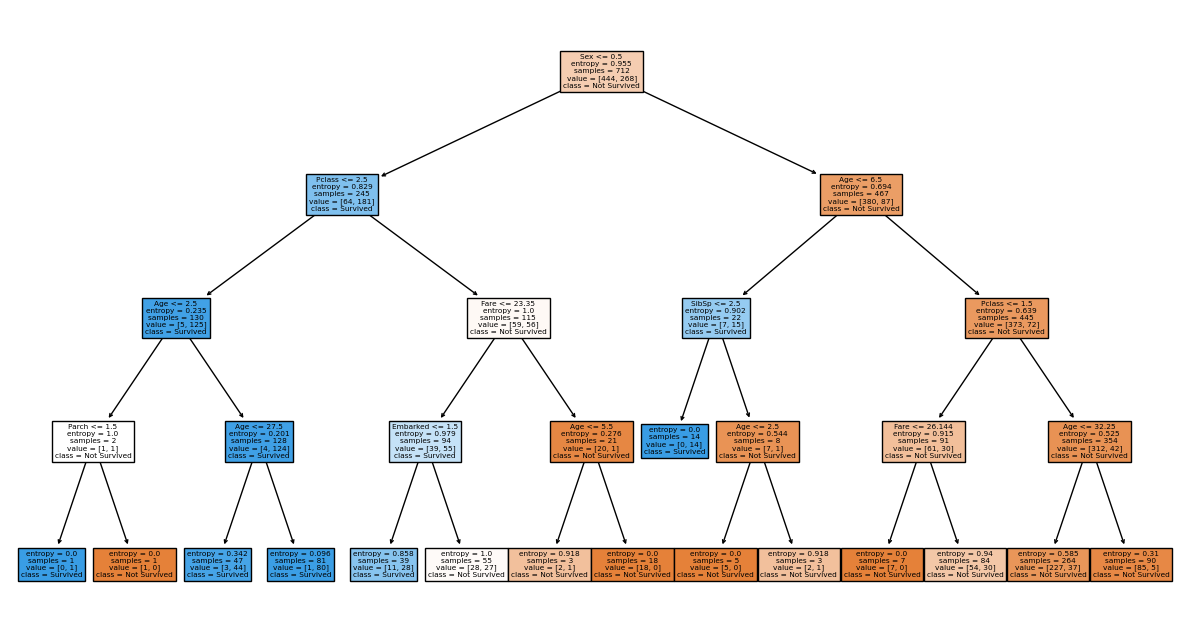

In [75]:
# ========== STEP 3: SPLIT INTO TRAIN & TEST ==========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== STEP 4: TRAIN DECISION TREE ==========
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# ========== STEP 5: VISUALIZE THE DECISION TREE ==========
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [76]:
# ========== STEP 6: EVALUATE THE MODEL ==========
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Precision: 0.84
Recall: 0.64
F1-Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



10) Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize
the clustering result.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
# ========== STEP 1: LOAD THE DATA ==========
df = pd.read_csv("Breast_Cancer.csv")  # Change file name if different
df.drop(columns=['id'], inplace=True)  # Drop unnecessary columns


In [96]:
#remove unwanted column
df.drop(columns=['Unnamed: 32'], inplace=True)

In [98]:
# Step 4: Handle missing values (if any) by dropping rows with NaN values
df.dropna(inplace=True)

# Step 5: Select features (remove the target column if it's there, e.g., 'diagnosis')
X = df.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target column

# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Implement K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vamsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

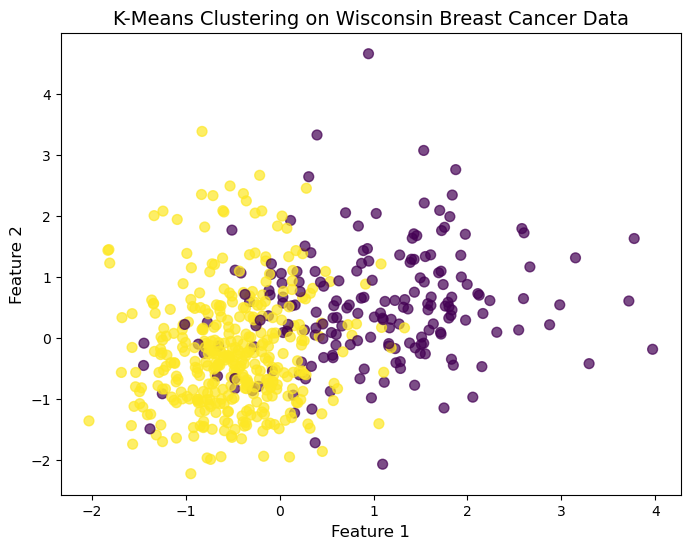

Inertia (Within-Cluster Sum of Squared Distances): 11595.461473962345


In [99]:
# Step 8: Add the predicted labels to the dataframe
df['Cluster'] = kmeans.labels_

# Step 9: Visualize the clustering results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering on Wisconsin Breast Cancer Data', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

# Optionally, you can evaluate the clustering with other metrics like silhouette score or inertia.
print('Inertia (Within-Cluster Sum of Squared Distances):', kmeans.inertia_)